In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date

In [2]:
### Load Data and Set up Data Frame ###

df = pd.read_pickle('../data/pickled_data/AFL259_short.pkl')

# Extreme dates for the continuous well data
min_date = datetime(2006,2,7)
max_date = datetime(2017,6,6)

# Restrict data to those dates
df = df.loc[(df.date >= min_date) & (df.date <= max_date)].copy()

# Drop 'date' column
df.drop(columns = ['date'])

# Set Date Range
date_rng = pd.date_range(start='2006-02-07', end='2017-06-06', freq='D')

# Set the index to be the DatetimeIndex
df.index = date_rng

# Check Freq (should be 'Day')
df.index.freq

<Day>

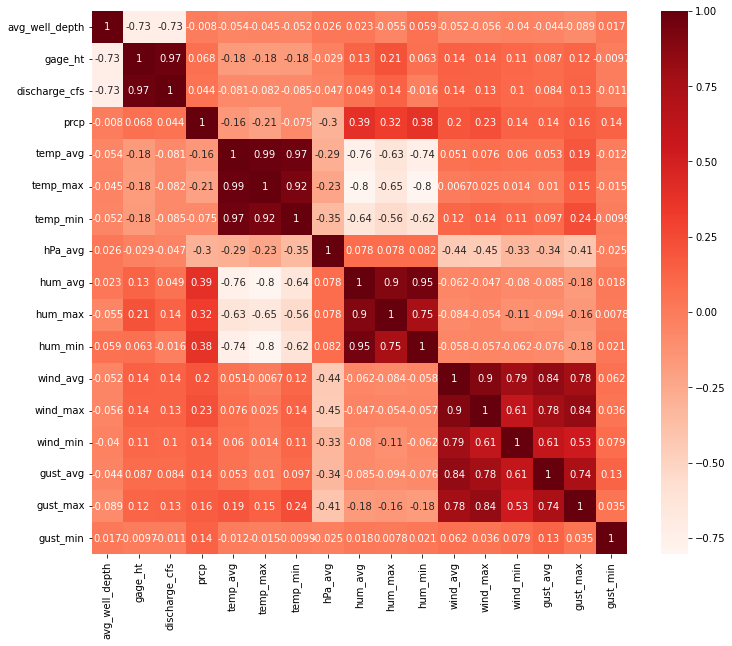

In [3]:
### Correlation Plot
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [4]:
# Define a threshold
threshold = 0.5  # You can adjust this threshold based on your needs

# Step 4: Feature selection or extraction based on the threshold
high_corr_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > threshold:
            colname = cor.columns[i]
            high_corr_features.add(colname)

# Print the high correlated features
print(f"Highly correlated features with a correlation threshold of {threshold}:")
print(high_corr_features)

# Drop the highly correlated features if needed
df_filtered = df.drop(columns=high_corr_features)

# Print the filtered DataFrame
print("\nFiltered DataFrame:")
print(df_filtered)

Highly correlated features with a correlation threshold of 0.5:
{'hum_min', 'hum_avg', 'hum_max', 'gust_max', 'gage_ht', 'gust_avg', 'temp_min', 'wind_max', 'discharge_cfs', 'wind_min', 'temp_max'}

Filtered DataFrame:
                 date  avg_well_depth  prcp   temp_avg      hPa_avg  wind_avg  \
2006-02-07 2006-02-07         91.0100   0.0  35.722500  1028.625000  5.826667   
2006-02-08 2006-02-08         91.0429   0.0  35.124167  1026.625000  6.366250   
2006-02-09 2006-02-09         91.1096   0.0  32.172500  1035.041667  8.732917   
2006-02-10 2006-02-10         91.1954   0.0  31.252083  1038.958333  9.655417   
2006-02-11 2006-02-11         91.3012   0.0  30.429583  1037.583333  7.250417   
...               ...             ...   ...        ...          ...       ...   
2017-06-02 2017-06-02         79.9221   0.0  64.462917  1016.625000  9.517083   
2017-06-03 2017-06-03         80.1263   0.0  69.525417  1012.916667  9.191667   
2017-06-04 2017-06-04         80.1322   0.0  59.8441